`pace-python` is a Python module which packages together "compiled" versions of the Matlab programs which comprises the PACE suite of inelastic neutron scattering data analysis programs.
It includes [Horace](https://github.com/pace-neutrons/Horace) and [SpinW](https://github.com/SpinW/SpinW) and interfaces between these programs and other PACE components such as [Euphonic](https://github.com/pace-neutrons/euphonic) and [Brille](https://github.com/brille/brille).

This notebook is an example of how to use `pace-python`.

At the moment you have to compile `pace-python` using:

```
git clone https://github.com/pace-neutrons/pace-python
cd pace-python
cmake .
cmake --build .
```

Then start this notebook. The next cell imports the `pace_python` module and starts the Matlab interpreter which is assigned as to the variable `m`.
All calls to Horace/SpinW methods are called as methods of `m`: you need to prefix such calls with `m.` as shown below.

In [1]:
from pace_python import Matlab
m = Matlab()

Found Matlab R2020a win64 at C:\Program Files\MATLAB\R2020a
Set C:\Program Files\MATLAB\R2020a\runtime\win64;C:\Program Files\MATLAB\R2020a\sys\os\win64;C:\Program Files\MATLAB\R2020a\bin\win64;C:\Program Files\MATLAB\R2020a\extern\bin\win64
Interface opened
Found Matlab R2020a win64 at C:\Program Files\MATLAB\R2020a
Set C:\Program Files\MATLAB\R2020a\runtime\win64;C:\Program Files\MATLAB\R2020a\sys\os\win64;C:\Program Files\MATLAB\R2020a\bin\win64;C:\Program Files\MATLAB\R2020a\extern\bin\win64
Interface opened


Usually Matlab plots appear in separate windows, but with Jupyter notebooks it is more usual to have them appear as pictures inside the notebook.
This behaviour can be changed with a "magic" function, `%pace_python`:

You can get help on it using:

In [2]:
%pace_python?

By default the `'inline'` option is used with a 400x300@150 dpi figure. We will change that to 100 dpi:

In [3]:
%pace_python inline -r 100

The following cell demostrates a simple cut.

The dataset used here is publically available on [zenodo/4088240](https://zenodo.org/record/4088240) as an archive [data_generation.tar.gz](https://zenodo.org/record/4088240/files/data_generation.tar.gz?download=1). Alternatively you could use your own data in `.sqw` format.

In [4]:
# For this demo we keep only reduced data cuts from a larger dataset
# The cuts were generated using:
#
# proj = m.projaxes([1, 0, 0], [0, 1, 0], 'type', 'rrr')
# w1 = m.cut_sqw('datafiles/pcsmo_ei70_base_bkd.sqw', proj, [-1, 0.05, 1], [-1, 0.05, 1], [], [10, 0.5, 20])
# w1.save('datafiles/pcsmo_cut1.sqw')
# w2 = m.cut_sqw('pcsmo_ei70_base_bkd.sqw', proj, [-1, 0.05, 1], [-0.2, 0.2], [], [5, 0.5, 65])
# w2.save('datafiles/pcsmo_cut2.sqw')

--------------------------------------------------------------------------------
Taking cut from data in file datafiles/pcsmo_cut1.sqw...
Time to read header information:
Elapsed time is 0.547 seconds
    CPU time is 0.5 seconds
 
Step   1 of    1; Have read data for 257683 pixels -- now processing data... ----->  retained  234060 pixels
-----------------------------
Inside cut_data:
  Timings for reading:
        Elapsed time is 0.071007 seconds
            CPU time is 0.0625 seconds
 
  Timings in accumulate_cut:
        Elapsed time is 0.028008 seconds
            CPU time is 0.03125 seconds
-----------------------------
 
Number of points in input file: 257683
         Fraction of file read: 100.0000 %   (=257683 points)
     Fraction of file retained: 90.8325 %   (=234060 points)
 
Total time in cut_sqw:
Elapsed time is 0.37199 seconds
    CPU time is 0.39063 seconds
--------------------------------------------------------------------------------


array([], shape=(0, 0), dtype=float64)

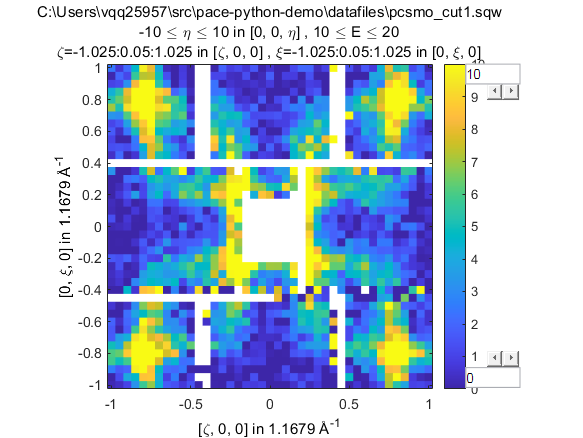

In [5]:
proj = m.projaxes([1, 0, 0], [0, 1, 0], 'type', 'rrr')
w1 = m.cut_sqw('datafiles/pcsmo_cut1.sqw', proj, [-1, 0.05, 1], [-1, 0.05, 1], [-10, 10], [10, 20], '-nopix')
w1.plot()
m.lz(0, 10)

We can also make a cut within a cut. Note the absence of the `'-nopix'` option, which keeps all the pixels in the cut `w2`, allowing us to cut it again.
With the `'-nopix'` option, the output workspace (`w1`) has only the rebinned data, and the original pixels are discarded.

We then make a cut of the data in `w2` to produce `w3` using the `'-nopix'` option since we don't want to make further cuts of the data from `w3`.

Note that in the original `w2` cut we have to provide the data file name, the projection, and 4 binning parameters for each of the 4 axes $(Q_h, Q_k, Q_l, \hbar\omega)$.
In contrast in making the cut `w3` we only provide 2 binning parameters because `w2` is a 2D object and we know the data source and projection.

We can then see below that `w3` is of a `d2d` type (without pixel information), whilst `w2` is an `sqw` type (with pixel information)

Finally, note we use a variant of the `plot` command. Previously we used `w1.plot()` but `m.plot(w1)` is equivalent and works the same.

--------------------------------------------------------------------------------
Taking cut from data in file datafiles/pcsmo_cut2.sqw...
Time to read header information:
Elapsed time is 0.06501 seconds
    CPU time is 0.0625 seconds
 
Step   1 of    1; Have read data for 636602 pixels -- now processing data... ----->  retained  636600 pixels
-----------------------------
Inside cut_data:
  Timings for reading:
        Elapsed time is 0.015999 seconds
            CPU time is 0 seconds
 
  Timings in accumulate_cut:
        Elapsed time is 0.025009 seconds
            CPU time is 0.03125 seconds
 
  Timings for handling pixel information
        Elapsed time is 0.043991 seconds
            CPU time is 0.046875 seconds
-----------------------------
 
Number of points in input file: 636602
         Fraction of file read: 100.0000 %   (=636602 points)
     Fraction of file retained: 99.9997 %   (=636600 points)
 
Total time in cut_sqw:
Elapsed time is 0.14201 seconds
    CPU time is 0.125 

array([], shape=(0, 0), dtype=float64)

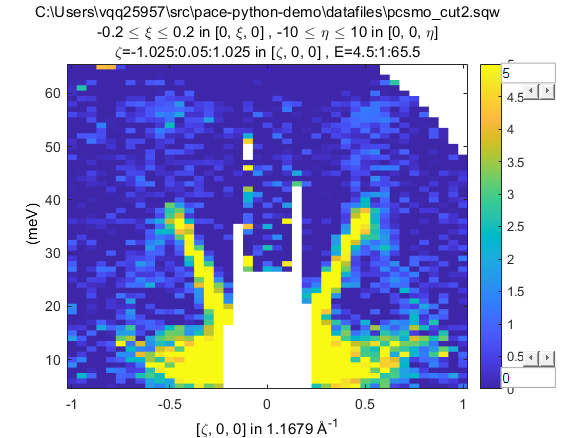

In [6]:
w2 = m.cut_sqw('datafiles/pcsmo_cut2.sqw', proj, [-1, 0.05, 1], [-0.2, 0.2], [-10, 10], [5, 1, 65])
m.plot(w2)
m.lz(0, 5)

--------------------------------------------------------------------------------
Taking cut from sqw object...
 
Have data from 57712 pixels - now processing data...
-----------------------------
Inside cut_data:
  Timings for reading:
        Elapsed time is 0.0079956 seconds
            CPU time is 0.015625 seconds
 
  Timings in accumulate_cut:
        Elapsed time is 0.0080032 seconds
            CPU time is 0.015625 seconds
-----------------------------
 
    Number of points in object: 636600
  Fraction of object processed: 9.0657 %   (=57712 points)
   Fraction of object retained: 6.0968 %   (=38812 points)
 
Total time in cut_sqw:
Elapsed time is 0.05101 seconds
    CPU time is 0.0625 seconds
--------------------------------------------------------------------------------
The type of w2 is: sqw
The type of w3 is: d1d


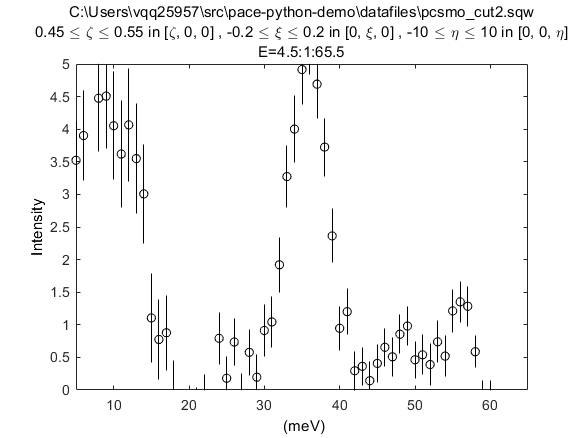

In [7]:
m.acolor('black')
w3 = w2.cut([0.45, 0.55], [5, 1, 65], '-nopix')
m.plot(w3)
m.ly(0, 5)

print(f'The type of w2 is: {m.type(w2)}')
print(f'The type of w3 is: {m.type(w3)}')

The next example is more complicated and involves computing a theoretical spectrum from a user defined model.

The model is that for spin waves in bcc-iron, and is defined as a Python function.

First we make a cut of a measurement of excitations in iron, and then simulate a spectra on the q-points covered in this cut.

We then define the model as a Python function and evaluate the model.

--------------------------------------------------------------------------------
Taking cut from data in file datafiles/fe_cut.sqw...
Time to read header information:
Elapsed time is 0.19299 seconds
    CPU time is 0.25 seconds
 
Step   1 of    1; Have read data for 32960 pixels -- now processing data... ----->  retained  13190 pixels
-----------------------------
Inside cut_data:
  Timings for reading:
        Elapsed time is 0.0099945 seconds
            CPU time is 0 seconds
 
  Timings in accumulate_cut:
        Elapsed time is 0.0060043 seconds
            CPU time is 0 seconds
 
  Timings for handling pixel information
        Elapsed time is 0.0029984 seconds
            CPU time is 0.015625 seconds
-----------------------------
 
Number of points in input file: 147794
         Fraction of file read: 22.3013 %   (=32960 points)
     Fraction of file retained: 8.9246 %   (=13190 points)
 
Total time in cut_sqw:
Elapsed time is 0.05899 seconds
    CPU time is 0.046875 seconds
----

<proxy for Matlab matlab.ui.Figure object>

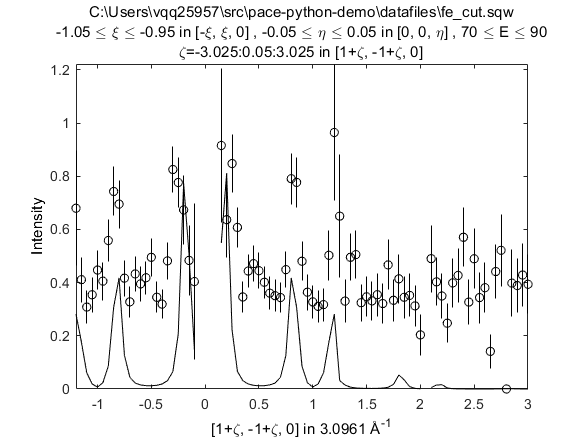

In [8]:
# Make a cut of the data
proj = {'u':[1,1,0], 'v':[-1,1,0], 'type':'rrr'}
energy_range = range(80, 160, 20)
w_fe = m.cut_sqw('datafiles/fe_cut.sqw', proj, [-3,0.05,3], [-1.05,-0.95], [-0.05,0.05], [70, 90])

# Parameters for the form factor of Fe2+
A=0.0706; a=35.008;  B=0.3589; b=15.358;  C=0.5819; c=5.561;  D=-0.0114;

# Define the Python function
import numpy as np
def py_fe_sqw(h, k, l, e, p):
    js = p[0]
    d = p[1]
    om = d + (8*js) * (1 - np.cos(np.pi * h) * np.cos(np.pi * k) * np.cos(np.pi * l))
    q2 = ((1/(2*2.87))**2) * (h**2 + k**2 + l**2)
    ff = A * np.exp(-a*q2) + B * np.exp(-b*q2) + C * np.exp(-c*q2) + D
    return (ff**2) * (p[4]/np.pi) * (e / (1-np.exp(-11.602*e/p[3]))) * (4 * p[2] * om) / ((e**2 - om**2)**2 + 4*(p[2] * e)**2)

# Starting parameters for fit
J = 35;     # Exchange interaction in meV
D = 0;      # Single-ion anisotropy in meV
gam = 30;   # Intrinsic linewidth in meV (inversely proportional to excitation lifetime)
temp = 10;  # Sample measurement temperature in Kelvin
amp = 300;  # Magnitude of the intensity of the excitation (arbitrary units)

# Evaluate the mode on the cut with the starting parameters
w_cal = m.sqw_eval(w_fe, py_fe_sqw, [J, D, gam, temp, amp])

# Plots the data and model together
m.plot(w_fe)
m.pl(w_cal)

We now try to fit the data in the cut with the model.

For the fit, we also add a linear background. We use the `linear_bg` function built into Horace, but this is Matlab function so, we need to call `eval` to obtain an anonymous handle to it.

In the `fit` call we specify the `'comp'` option which means that it returns a `dict` with separate components, `fore` (the foreground fit function), `back` (the linear background) and `sum` (the total). We'll then plot the `sum` and `back` components on top of the data.

--------------------------------------------------------------------------------
Beginning fit (max 20 iterations)
--------------------------------------------------------------------------------
Starting point
------------------
 Total time = 0.063524s    Reduced Chi^2 = 13.0961
 Free parameter values:
            35             30            300            0.1 
 
--------------------------------------------------------------------------------
Iteration = 1
------------------
 Total time = 0.16132s    Reduced Chi^2 = 1.6672      Levenberg-Marquardt = 0.1
 Free parameter values:
         36.25          54.32          349.3         0.3401 
 
--------------------------------------------------------------------------------
Iteration = 2
------------------
 Total time = 0.20461s    Reduced Chi^2 = 1.5924      Levenberg-Marquardt = 0.01
 Free parameter values:
         39.88          82.42          427.3         0.3475 
 
---------------------------------------------------------------------

<proxy for Matlab matlab.ui.Figure object>

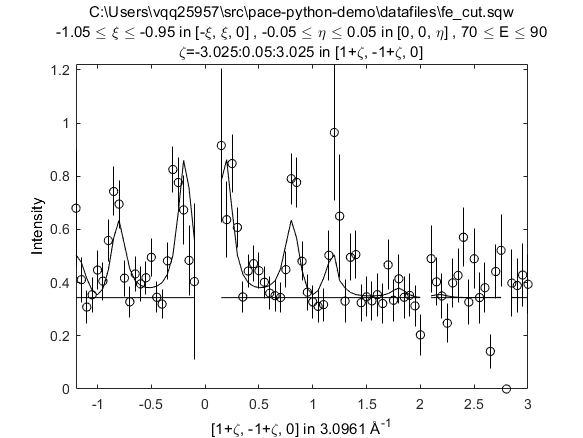

In [9]:
# Define linear background function
linear_bg = m.eval('@linear_bg')

kk = m.multifit_sqw(w_fe)
kk = kk.set_fun (py_fe_sqw, [J, D, gam, temp, amp])
kk = kk.set_free ([1, 0, 1, 0, 1])
kk = kk.set_bfun (linear_bg, [0.1,0])
kk = kk.set_bfree ([1,0])
kk = kk.set_options ('list',2)

# Run and time the fit
m.tic()
wfit, fitdata = kk.fit('comp')
t_ana = m.toc();
print(f'Time to run fit: {t_ana}s')

# Plot it
m.plot(w_fe)
m.pl(wfit['sum'])
m.pl(wfit['back'])

We now turn to an example with the `spinw` package to calculate spin waves. 
We will reuse the bcc-iron dataset, but instead of a simple dispersion calculated in a Python function, we define a SpinW model for it.
While SpinW is more flexible, it is *much* more computationally intensive than the analytic model used before.

For more information on the syntax of SpinW, please see the [tutorials](https://spinw.org/tutorials/) and [documentation](https://spinw.org/SWclass/).
These are in Matlab syntax but the syntax here in Python is fairly similar, with some exceptions:

* Constructors (like in `fe = m.spinw()`) require an explicit brackets (so `fe = m.spinw` will not work).
* Matlab functions like `diag` must be preceded by `m.` and array elements needs `,` comma separators.
* `.T` is used for transposed in `numpy` instead of the `'` operator.

Creating the bond list (maxDistance = 8 , nCell = 3x3x3)...
...168 bonds are retained out of 784 generated!
Creating 3D plot... 
> In swplot.figure (line 142)
  In swplot.activefigure (line 71)
  In spinw/plot (line 150)
  In call_method (line 100)
...18k faces and 11k vertices are drawn!


<proxy for Matlab matlab.ui.Figure object>

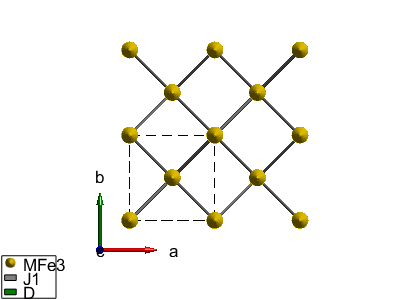

In [10]:
a = 2.87;

fe = m.spinw();
fe.genlattice('lat_const', [a, a, a], 'angled', [90, 90, 90], 'spgr', 'I m -3 m')  # bcc Fe
fe.addatom('label', 'MFe3', 'r', [0, 0, 0], 'S', 5/2, 'color', 'gold')
fe.gencoupling()
fe.addmatrix('label', 'J1', 'value', 1, 'color', 'gray')
fe.addmatrix('label', 'D', 'value', m.diag([0, 0, -1]), 'color', 'green')
fe.addcoupling('mat', 'J1', 'bond', 1)
fe.addaniso('D')
fe.genmagstr('mode', 'direct', 'S', np.array([[0., 0., 1.], [0., 0., 1.]]).T);  # Ferromagnetic

# Plots the structure
m.plot(fe, 'range', [2, 2, 2])

Once we define the SpinW model, we can evaluate it just like before, using the `.horace_sqw` gateway method of the `spinw` object.

First we need to define some parameters for the spectrum evaluation.
These are not defined in the model above because they are specific to the calculation of the spectrum and not of the model itself.
They are essentially the same options which go to `fe.spinwave()` when called normally in SpinW.

Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 13184)...
The magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
Calculation finished.
Time to evaluate a single iteration: 0.6176215s


<proxy for Matlab matlab.ui.Figure object>

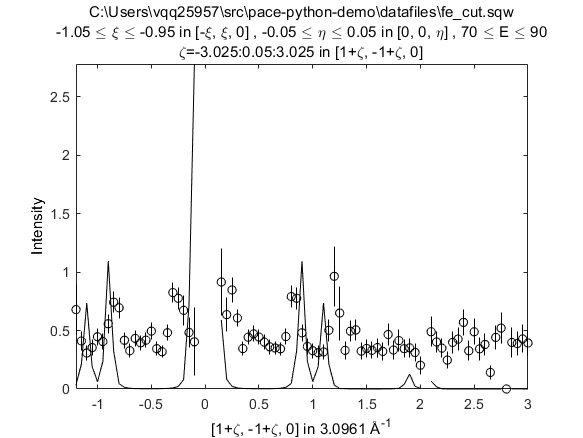

In [11]:
# Constant parameters for SpinW model
# Note that we use the damped harmonic oscillator resolution model ('sho')
cpars = ['mat', ['J1', 'D(3,3)'], 'hermit', False, 'optmem', 1,
         'useFast', True, 'resfun', 'sho', 'formfact', True];

kk = m.multifit_sqw(w_fe)
kk = kk.set_fun (fe.horace_sqw, [[J, D, gam, temp, amp]]+cpars)
kk = kk.set_free ([1, 0, 1, 0, 1]);
kk = kk.set_bfun (linear_bg, [0.1,0]);
kk = kk.set_bfree ([1,0]);
kk = kk.set_options ('list',2);

# Time a single iteration
m.tic()
wsim = kk.simulate('comp');
t_spinw_single = m.toc();

print(f'Time to evaluate a single iteration: {t_spinw_single}s')

m.plot(w_fe)
m.pl(wsim['fore'])

We see that a single iteration with SpinW takes longer than the full fitting with the analytic function.

We now try the fit, and see how long it takes and how well it works.

In [12]:
# Time the fit
m.tic()
wfit, fitdata = kk.fit('comp');
t_spinw = m.toc();

--------------------------------------------------------------------------------
Beginning fit (max 20 iterations)
Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 13184)...
The magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
Calculation finished.
--------------------------------------------------------------------------------
Starting point
------------------
 Total time = 0.37939s    Reduced Chi^2 = 19.6173
 Free parameter values:
            35             30            300            0.1 
 
--------------------------------------------------------------------------------
Iteration = 1
------------------
Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 13184)...
The magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
Calculation finished.
Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl

Calculation finished.
 Total time = 9.9988s    Reduced Chi^2 = 1.6098      Levenberg-Marquardt = 0.0001
 Free parameter values:
        -200.6     -1.795e+04          -2248         0.3381 
 
--------------------------------------------------------------------------------
Iteration = 7
------------------
Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 13184)...
The magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
Calculation finished.
Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 13184)...
The magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
Calculation finished.
Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 13184)...
The magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
Calculation finished.
Calculat

Time for SpinW fit = 17.8960196s


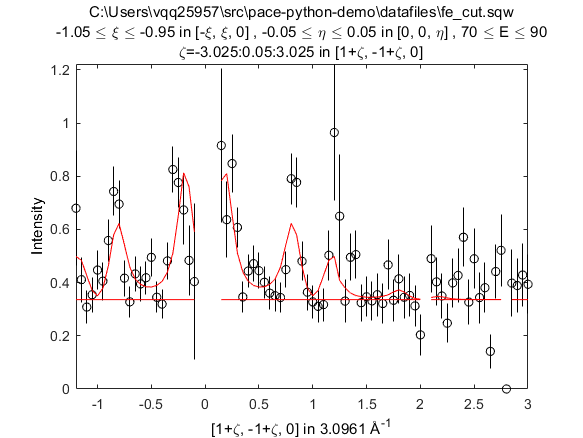

In [13]:
print(f'Time for SpinW fit = {t_spinw}s')

m.acolor('black');
hf3 = m.plot(w_fe);
m.acolor('red');
m.pl(wfit['sum']);
m.pl(wfit['back']);

# TODO: Print out fitted values and errors

Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 13184, nTwin = 1)...
Creating Brille grid
Filling Brille grid
Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 48230, nTwin = 1)...
No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
Calculation finished.
The magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
Calculation finished.
Time to fill Brille grid: 20.295091s
Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 13184, nTwin = 1)...
The magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
Calculation finished.
Time to evaluate a single iteration: 1.8712592s


<proxy for Matlab matlab.ui.Figure object>

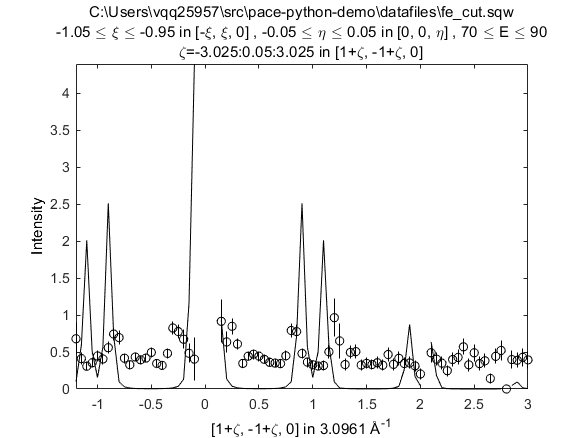

In [14]:
# Run through it again using Brille
cpars = ['mat', ['J1', 'D(3,3)'], 'hermit', False, 'optmem', 1,
         'useFast', False, 'resfun', 'sho', 'formfact', True, 'use_brille', True];

kk = m.multifit_sqw(w_fe)
kk = kk.set_fun (fe.horace_sqw, [[J, D, gam, temp, amp]]+cpars)
kk = kk.set_free ([1, 0, 1, 0, 1]);
kk = kk.set_bfun (linear_bg, [0.1,0]);
kk = kk.set_bfree ([1,0]);
kk = kk.set_options ('list',2);

# Time a single iteration
m.tic()
wsim = kk.simulate('comp');
t_spinw_fill = m.toc();

print(f'Time to fill Brille grid: {t_spinw_fill}s')

m.tic()
wsim = kk.simulate('comp');
t_spinw_single = m.toc();

print(f'Time to evaluate a single iteration: {t_spinw_single}s')

m.acolor('k')
m.plot(w_fe)
m.pl(wsim['fore'])

Finally we end with an example of using Euphonic to evaluate spectrum from a phonon DFT calculation.

Euphonic is a Python package so we have to install it first.
You can do this using `pip` (`pip install euphonic[phonopy_reader]`).
We also use an interface package, `euphonic_sqw_models` but this is installed directly by `pace_python`.

First we load a DFT calculation into a Euphonic `ForceConstants` object.
This is the basic Euphonic object and most functionalities of Euphonic is accessible from this object.
For more information, please see the [documentation](https://euphonic.readthedocs.io).

From the `ForceConstants` object we create a `CoherentCrystal` object which is what we will use to simulate the neutron spectrum.
The `CoherentCrystal` object acts as an interface between Horace and Euphonic and provides a gateway method, `.horace_disp` which is passed to the Horace `disp2sqw_eval` function.


--------------------------------------------------------------------------------
Taking cut from data in file datafiles/quartz_cut.sqw...
Time to read header information:
Elapsed time is 0.836 seconds
    CPU time is 1.1563 seconds
 
Step   1 of    1; Have read data for 19509 pixels -- now processing data... ----->  retained  15395 pixels
-----------------------------
Inside cut_data:
  Timings for reading:
        Elapsed time is 0.015999 seconds
            CPU time is 0.015625 seconds
 
  Timings in accumulate_cut:
        Elapsed time is 0.0090027 seconds
            CPU time is 0 seconds
 
  Timings for handling pixel information
        Elapsed time is 0.0019989 seconds
            CPU time is 0 seconds
-----------------------------
 
Number of points in input file: 48095
         Fraction of file read: 40.5635 %   (=19509 points)
     Fraction of file retained: 32.0096 %   (=15395 points)
 
Total time in cut_sqw:
Elapsed time is 0.108 seconds
    CPU time is 0.14063 seconds
----

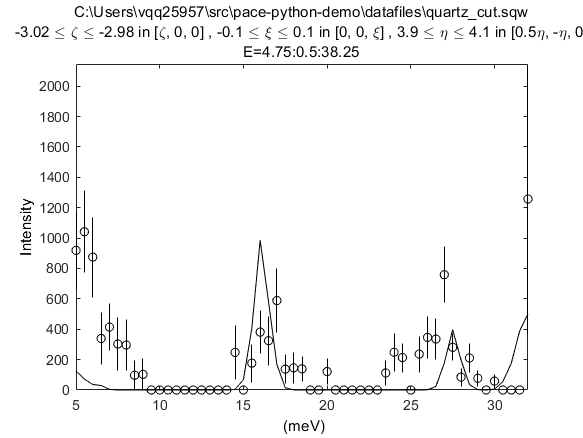

In [15]:
from euphonic import ForceConstants
from euphonic_sqw_models import CoherentCrystal

fc = ForceConstants.from_castep('datafiles/quartz.castep_bin')
euobj = CoherentCrystal(fc, debye_waller_grid=[6, 6, 6], temperature=100,
                        negative_e=True, asr=True, chunk=10000, use_c=True)

scalefac = 200
effective_fwhm = 1
intrinsic_fwhm = 0.1

wsc = m.cut_sqw('datafiles/quartz_cut.sqw', [-3.02, -2.98], [5, 0.5, 38])

# Calculate spectra with simple energy convolution (fixed width Gaussian)
wsim = m.disp2sqw_eval(wsc, euobj.horace_disp, (scalefac), effective_fwhm)

m.acolor('black')
hf = m.plot(wsc); m.pl(wsim);

Finally, we can repeat the simulation above but using the full instrument resolution calculation using the `tobyfit` method of Horace

Using Euphonic to interpolate for q-points 0:9561 out of 9561
Using Euphonic to interpolate for q-points 0:9561 out of 9561
Using Euphonic to interpolate for q-points 0:9561 out of 9561
Using Euphonic to interpolate for q-points 0:9561 out of 9561
Using Euphonic to interpolate for q-points 0:9561 out of 9561
Using Euphonic to interpolate for q-points 0:9561 out of 9561
Using Euphonic to interpolate for q-points 0:9561 out of 9561
Using Euphonic to interpolate for q-points 0:9561 out of 9561
Using Euphonic to interpolate for q-points 0:9561 out of 9561
Using Euphonic to interpolate for q-points 0:9561 out of 9561


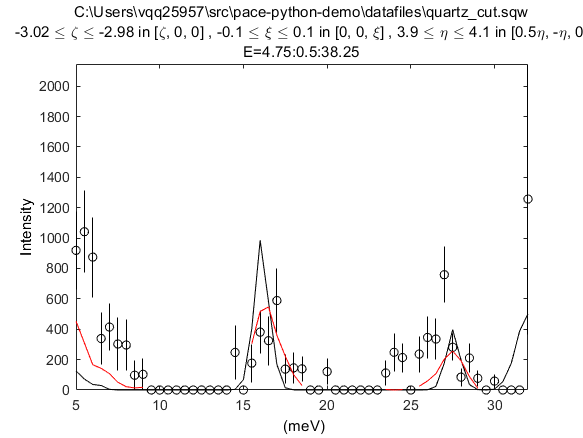

In [16]:
# Calculate spectra with full instrument resolution convolution
is_crystal = True;
xgeom = [0,0,1];
ygeom = [0,1,0];
shape = 'cuboid';
shape_pars = [0.01,0.05,0.01];
wsc = m.set_sample(wsc, m.IX_sample(is_crystal, xgeom, ygeom, shape, shape_pars));
ei = 40; freq = 400; chopper = 'g';
wsc = m.set_instrument(wsc, m.merlin_instrument(ei, freq, chopper));
disp2sqwfun = m.eval('@disp2sqw');
kk = m.tobyfit(wsc);
kk = kk.set_fun(disp2sqwfun, [euobj.horace_disp, [scalefac], intrinsic_fwhm]);
wtoby = kk.simulate()

hf = m.plot(wsc); m.pl(wsim); m.acolor('red'); m.pl(wtoby);